<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Avance_Proyecto_263166.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance del Proyecto**

[Escribe aquí el Título del Proyecto]


Nombre: Laila Bulhosen

Matrícula: 263166

Fecha: 10/26/2025

## **1) Introducción**


*   **Descripción breve del problema.**

    En la actualidad se ha visto que el hábito de consumo de sustancias como la cafeína, alcohol y tabaco pueden tener efecto en la calidad de vida y salud de las personas que consumen dichas sustancias.



*   **Objetivo general del proyecto y objetivos específicos**

    Desarrollar un modelo predictivo que permita analizar cómo el consumo de cafeína, alcohol y tabaco, influyen en factores de salud como el índice de masa corporal (BMI), la calidad del sueño y el rítmo cardiaco de las personas.

    *   Analizar la relación entre consumo de cafeína, alcohol y tabaco en factores como BMI, niveles de estres y estado de salud en general.
    *   Analizar el impacto de realizar actividad física, si esto ayuda a disminuir los efectos de las sustancias estimulantes.



# **2) Descripción del dataset**


Fuente de los datos.

  El dataset a utilizar contiene información de la ingesta de café de 10,000 de veinte países diferentes, esta base de datos por Kaggle se encuentra disponible en: [Global Coffee Health Dataset](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset/data).

 La tabla se conforma por las siguientes columnas:
 | Columna | Descripción |
 |-------------|------------|
 | ID | Identificador |
 | Age | Edad del participante |
 | Gender | Género Masculino, Femenino, Otro |
 | Country | Pais de residencia del participante |
 | Coffe_Intake | Consumo en tazas de café (0-10) |
 | Caffeine_mg | Consumo estimado de cafeína en mg |
 | Sleep_Hours | Promedio de horas de sueño por noche |
 | Sleep_Quality | Basada en las horas de sueño |
 | BMI | Indice de masa corporal |
 | Heart_Rate | Pulso cardiaco en reposo |
 | Stress_Level | Estres basado en las horas de sueño y estilo de vida |
 | Physical_Activity_Hours| Horas de actividad física por semana|
 | Health_Issues|Basado en la edad, BMI y horas de sueño|
 |Occupation|Oficina, Sector salud, Estudiante, Servicio, Otros|
 | Smoking | Fuma si, no|
 | Alcohol_Consumption | Consumo de alcohol si, no|

- Número de registros y variables.

  Se cuentan con 10,000 registros y 16 columnas.

- Variables principales de interés.

  Las variables de interés principales son Caffeine_mg, Stress_Level, Smoking, Alcohol_Consumption


- Limitaciones del dataset.

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/Proyecto/synthetic_coffee_health_10000.csv')

print('\n\nVerificacion de datos nulos:\n',df.isnull().sum())




Verificacion de datos nulos:
 ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


In [129]:
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/Proyecto/synthetic_coffee_health_10000.csv', na_filter= False)

print('Vista previa del dataset:\n',df.head())

print('\n\nVerificacion de datos nulos:')
print(df.info())

print('\n\nDescripción estadistica del dataset:\n',df.describe())



Vista previa del dataset:
    ID  Age  Gender  Country  Coffee_Intake  Caffeine_mg  Sleep_Hours  \
0   1   40    Male  Germany            3.5        328.1          7.5   
1   2   33    Male  Germany            1.0         94.1          6.2   
2   3   42    Male   Brazil            5.3        503.7          5.9   
3   4   53    Male  Germany            2.6        249.2          7.3   
4   5   32  Female    Spain            3.1        298.0          5.3   

  Sleep_Quality   BMI  Heart_Rate Stress_Level  Physical_Activity_Hours  \
0          Good  24.9          78          Low                     14.5   
1          Good  20.0          67          Low                     11.0   
2          Fair  22.7          59       Medium                     11.2   
3          Good  24.7          71          Low                      6.6   
4          Fair  24.1          76       Medium                      8.5   

  Health_Issues Occupation  Smoking  Alcohol_Consumption  
0          None      Other    

# **3) Preguntas de análisis descriptivo**
- Formular al menos tres preguntas directamente relacionadas con el problema del proyecto.

Ejemplos:
- ¿Cuál es la distribución de la variable objetivo?
- ¿Qué diferencias existen entre categorías relevantes (ejemplo: clientes con y sin deuda, hombres y mujeres, productos por región)?
- ¿Existen valores atípicos que distorsionen la interpretación del conjunto de datos?

# **4) Métricas de calidad de los datos**

**Completitud**


In [106]:
### Completitud

completitud = df.isnull().sum()

print(completitud)


ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


No se encontraron datos faltantes, al cargar el dataframe se uso el parámetro "na_filter= False" pues python interpretaba el string "None" como dato nulo para la columna Health_Issues, cuando ese string significa que la persona no tiene problemas de salud.

**Consistencia**

In [107]:

df['Gender'] = pd.Categorical(df['Gender'], categories= ['Male','Female','Other'], ordered= True)

df['Sleep_Quality'] = pd.Categorical(df['Sleep_Quality'], categories= ['Poor','Fair','Good','Excellent'], ordered= True)

df['Stress_Level'] = pd.Categorical(df['Stress_Level'], categories= ['Low','Medium','High'], ordered= True)

df['Health_Issues'] = pd.Categorical(df['Health_Issues'], categories= ['None','Mild','Moderate','Severe'], ordered= True)

df['Smoking'] = df['Smoking'].astype('category')
df['Smoking'] = df['Smoking'].cat.rename_categories({1: 'Fumador', 0: 'No_fumador'})

df['Alcohol_Consumption'] = df['Alcohol_Consumption'].astype('category')
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].cat.rename_categories({1: 'Bebe', 0: 'No_bebe'})



In [108]:
print('Cuenta por categeoría para la columna "Gender"',df['Gender'].values)

Cuenta por categeoría para la columna "Gender" ['Male', 'Male', 'Male', 'Male', 'Female', ..., 'Female', 'Female', 'Male', 'Female', 'Female']
Length: 10000
Categories (3, object): ['Male' < 'Female' < 'Other']


Se cambiaron a datos categoricos para reducir memoria



**Unicidad**

In [109]:
# Duplicados
print('\nNumero de duplicados en dataset:',df.duplicated().sum())



Numero de duplicados en dataset: 0


**Validez**


In [110]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       10000 non-null  int64   
 1   Age                      10000 non-null  int64   
 2   Gender                   10000 non-null  category
 3   Country                  10000 non-null  object  
 4   Coffee_Intake            10000 non-null  float64 
 5   Caffeine_mg              10000 non-null  float64 
 6   Sleep_Hours              10000 non-null  float64 
 7   Sleep_Quality            10000 non-null  category
 8   BMI                      10000 non-null  float64 
 9   Heart_Rate               10000 non-null  int64   
 10  Stress_Level             10000 non-null  category
 11  Physical_Activity_Hours  10000 non-null  float64 
 12  Health_Issues            10000 non-null  category
 13  Occupation               10000 non-null  object  
 14  Smoking

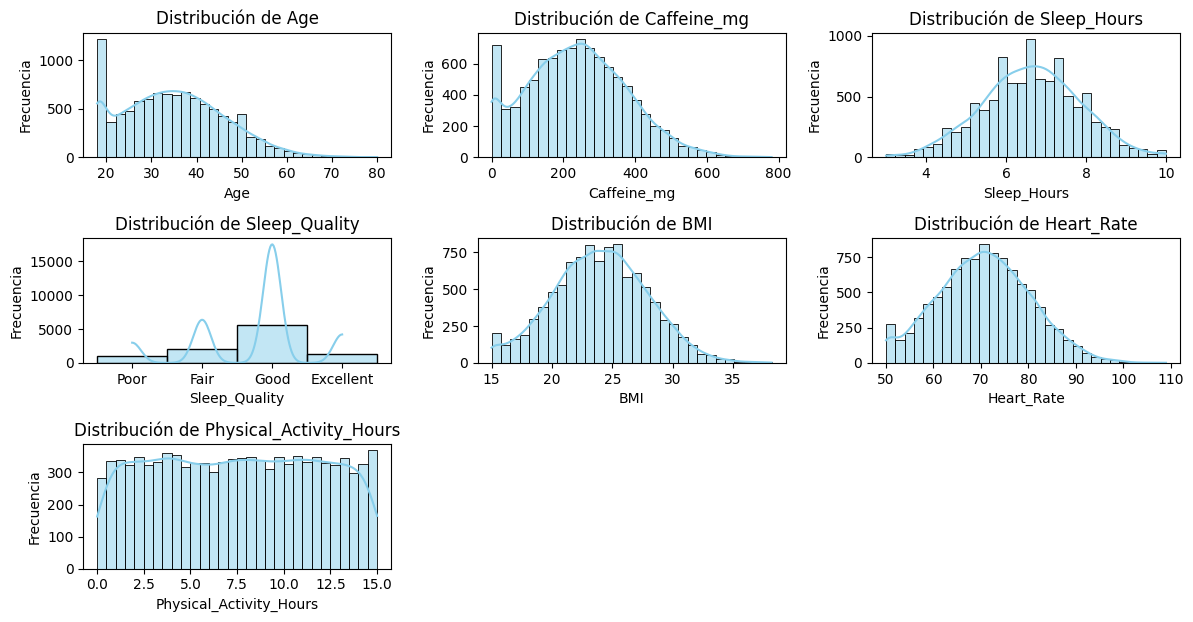

In [111]:

columns = df[['Age','Caffeine_mg','Sleep_Hours','Sleep_Quality','BMI','Heart_Rate','Physical_Activity_Hours']]

### Crear histogramas
plt.figure(figsize= (12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()


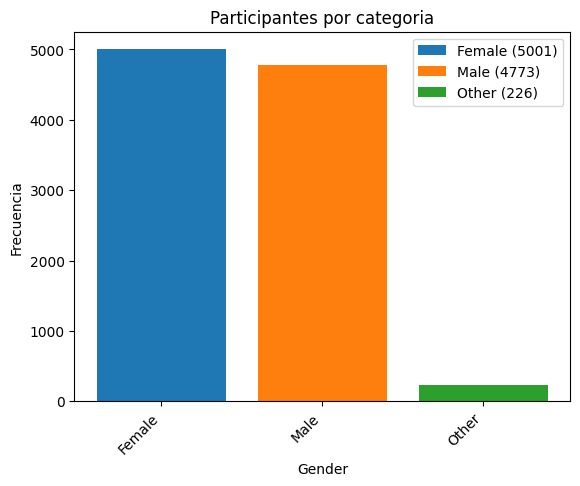

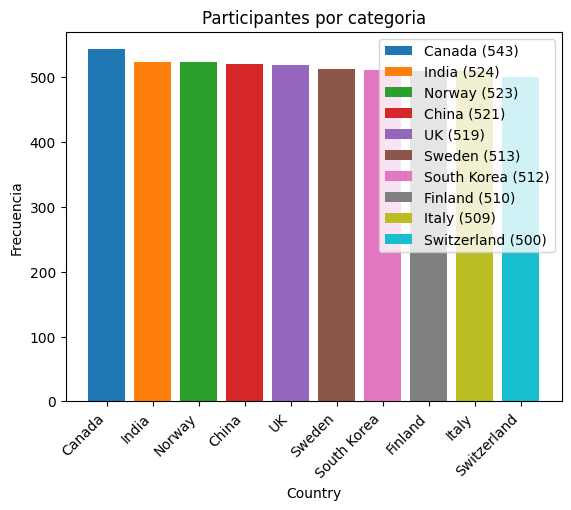

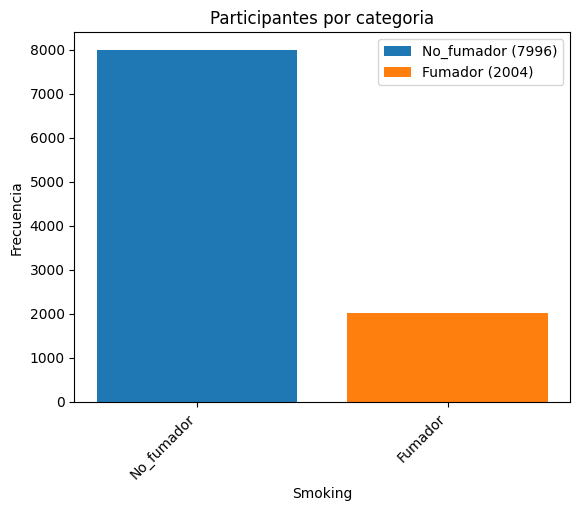

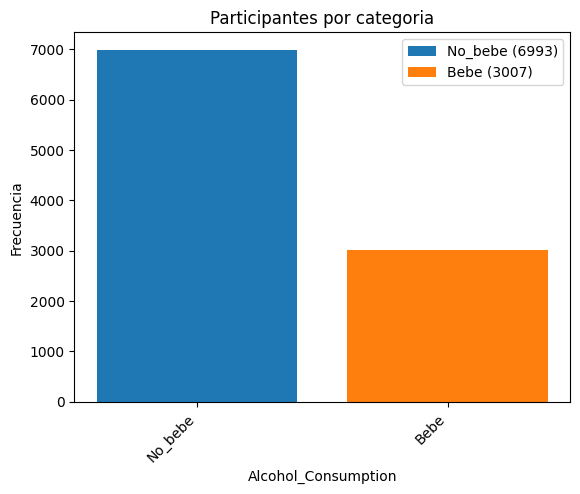

In [112]:

columns2 = ['Gender','Country','Smoking','Alcohol_Consumption']

for col in columns2:
  if col == 'Country':
    col_counts = df[col].value_counts().head(10)
  else:
    col_counts = df[col].value_counts()

  categories = col_counts.index
  counts = col_counts.values

  labels = [f'{cat} ({cnt})' for cat, cnt in zip(categories, counts)]

  for i in range(len(categories)):
      plt.bar(categories[i], counts[i], label=labels[i])

  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.title('Participantes por categoria')
  plt.xticks(rotation= 45, ha= 'right')
  plt.legend()
  plt.show()






# **5) Análisis descriptivo de los datos**

In [113]:
### Analisis estadistico basico
print('A continuacion se muestra el analisis estadistico basico.\n\n',df.describe())


A continuacion se muestra el analisis estadistico basico.

                 ID           Age  Coffee_Intake   Caffeine_mg   Sleep_Hours  \
count  10000.00000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    5000.50000     34.949100       2.509230    238.411010      6.636220   
std     2886.89568     11.160939       1.450248    137.748815      1.222055   
min        1.00000     18.000000       0.000000      0.000000      3.000000   
25%     2500.75000     26.000000       1.500000    138.750000      5.800000   
50%     5000.50000     34.000000       2.500000    235.400000      6.600000   
75%     7500.25000     43.000000       3.500000    332.025000      7.500000   
max    10000.00000     80.000000       8.200000    780.300000     10.000000   

                BMI    Heart_Rate  Physical_Activity_Hours  
count  10000.000000  10000.000000              10000.00000  
mean      23.986860     70.617800                  7.48704  
std        3.906411      9.822951            

In [114]:
print('A continuacion se muestran la frecuencia de las variables categoricas.\n')

print('Cuenta por categeoría para la columna "Gender"',df['Gender'].value_counts())
print('\nCuenta por categeoría para la columna "Sleep_Quality"',df['Sleep_Quality'].value_counts())
print('\nCuenta por categeoría para la columna "Stress_Level"',df['Stress_Level'].value_counts())
print('\nCuenta por categeoría para la columna "Health_Issues"',df['Health_Issues'].value_counts())


A continuacion se muestran la frecuencia de las variables categoricas.

Cuenta por categeoría para la columna "Gender" Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

Cuenta por categeoría para la columna "Sleep_Quality" Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

Cuenta por categeoría para la columna "Stress_Level" Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64

Cuenta por categeoría para la columna "Health_Issues" Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


**Visualizaciones Iniciales**

**Identificación de outliers**

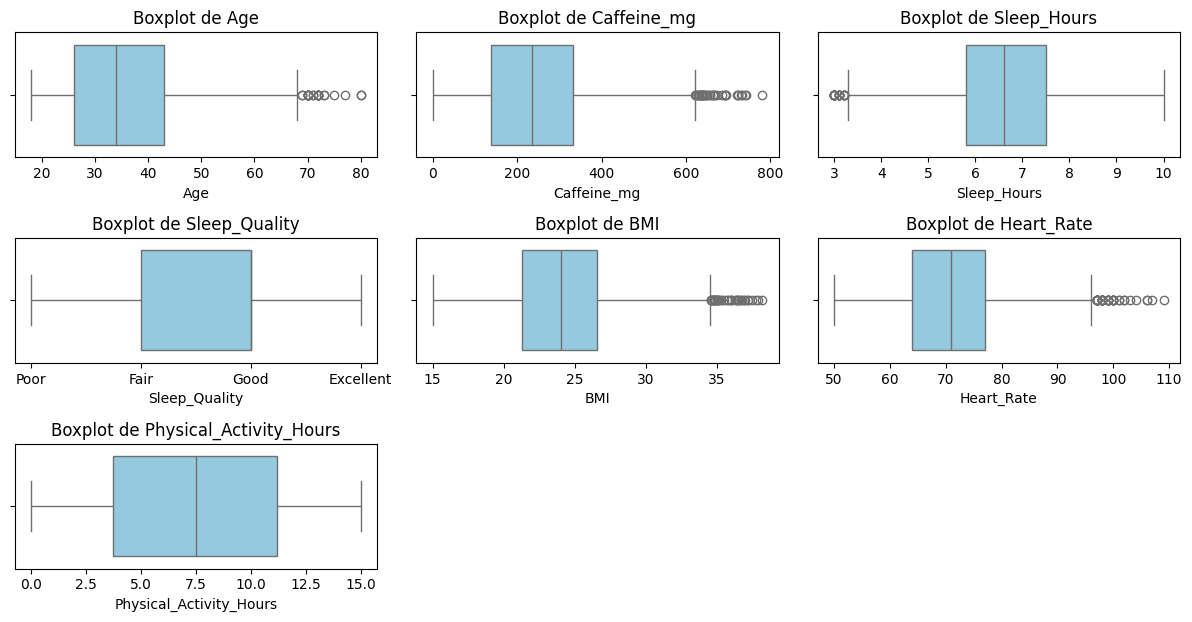

In [115]:
### Boxplot

columns = df[['Age','Caffeine_mg','Sleep_Hours','Sleep_Quality','BMI','Heart_Rate','Physical_Activity_Hours']]

### Crear boxplots
plt.figure(figsize= (12, 10))

for i, col in enumerate(columns, 1):
  plt.subplot(5, 3, i)
  sns.boxplot(x=df[col], color='skyblue')
  plt.title(f'Boxplot de {col}', fontsize=12)
  plt.xlabel(col, fontsize=10)


plt.tight_layout()
plt.show()

Con el resultado de los outliers podemos identifcar algunas cosas importantes.

En la colmuna de BMI vemos que la media de la poblacion se encuentra entre un nivel de 20-30 considerado un nivel saludable de indice de masa corporal pero se identifican participantes que su BMI los categoriza con sobrepeso con un BMI mayor de 30.

Del mismo modo para Hear_Rate se aprecia que la mayoria de los participantes tienen una frecuencia en reposo media entre 60-80 que es un nivel aceptable promedio para personas en un rango de edad entre 20 y 60 años, equivalente a la edad de los participantes de este estudio.

**Heatmap**

Matriz de correlación:
                               Age  Caffeine_mg  Sleep_Hours       BMI  \
Age                      1.000000    -0.011797     0.005010  0.008627   
Caffeine_mg             -0.011797     1.000000    -0.190493 -0.008706   
Sleep_Hours              0.005010    -0.190493     1.000000  0.008463   
BMI                      0.008627    -0.008706     0.008463  1.000000   
Heart_Rate              -0.000197     0.060027    -0.036219 -0.009362   
Physical_Activity_Hours  0.005931     0.005026    -0.011228  0.002042   

                         Heart_Rate  Physical_Activity_Hours  
Age                       -0.000197                 0.005931  
Caffeine_mg                0.060027                 0.005026  
Sleep_Hours               -0.036219                -0.011228  
BMI                       -0.009362                 0.002042  
Heart_Rate                 1.000000                -0.002919  
Physical_Activity_Hours   -0.002919                 1.000000  


<Axes: >

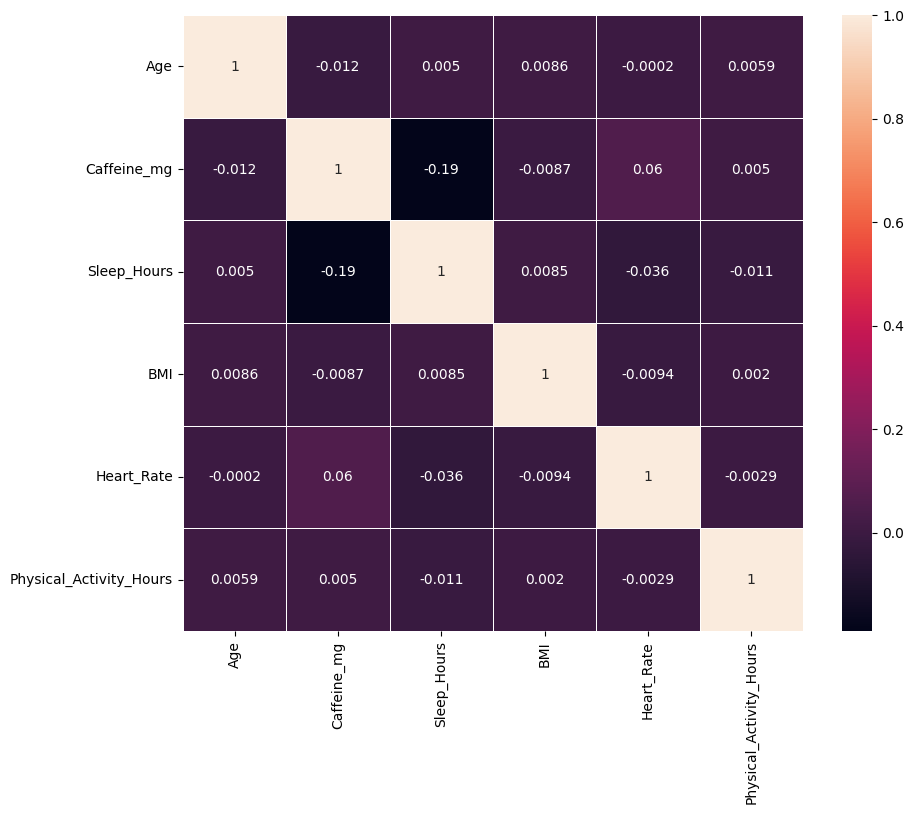

In [116]:
### Matriz de correlaciones
col_matrix = df[['Age','Caffeine_mg','Sleep_Hours','BMI','Heart_Rate','Physical_Activity_Hours']]

matriz_corr = col_matrix.corr()

print('Matriz de correlación:\n', matriz_corr)


### Heatmap

plt.figure(figsize= (10,8))
sns.heatmap(matriz_corr, annot= True, linewidths= 0.5)



**Interpretacón**

No se encontró ninguna correlación fuerte entre ninguna de las variables, pues todas muestran valores negativos. Se ve una relación positiva para Heart_Rate vs Caffeine_mg que puede entenderse que el consumo de cafeina tenga un efecto en el ritmo cardiaco del paciente.

# **6) Preprocesamiento de los datos**




*   **Tratamiento de datos faltantes**

    Al cargar el archivo y revisar la información con la función de isnull() en la sección 1, nos arrojó un total de 5941 valores nulos para la columna Health_Issues, pero hacer una confirmación con el archivo csv original y revisando la información sobre el sitio fuente del dataset, se comprobó que no había datos nulos dentro del dataset, para corregir esto, al cargar el dataset se le especifico a python que el string "None" no lo tomara como valor faltante ya que es una clasificación del estado de salud del paciente.

*   **Duplicados**

    El dataset no cuenta con valores duplicados, se verificó con la funcion duplicated() en la sección 4 de este documento.

*   **Tipos de datos**

    Se declararon como variables categoricas las columnas: Gender, Sleep_Quality, Stress_Level, Health_Issues en la sección 4, ya que estas variables funcionan como una clasificación.



# 7) Conclusiones parciales
- Principales hallazgos en calidad, análisis descriptivo y preprocesamiento.
- Estado de preparación del dataset para fases posteriores.

# **8) Pruebas de normalidad**

In [ ]:
numeric_columns = df.select_dtypes()